# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



In [153]:
df = pd.read_csv('./demo02.csv')

In [154]:
df.head()

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,0,1,0,0,0,0,0,0,0,1
2,2,0,0,1,0,52.356164,8.358904,1,0,1,...,0,1,0,0,0,0,0,0,0,1
3,3,1,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4,4,0,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [155]:
df = df.drop(columns = 'Unnamed: 0')

In [156]:
df.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [157]:
df.dtypes

sexo                                        int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                         int64
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
estado_civil_Married                        int64
estado_civil_Separated                      int64
estado_civil_Single / not married           int64
estado_civil_Widow                          int64


### Definindo e separando as variaveis treino e teste

In [158]:
y = df.mau
y

0        1
1        1
2        1
3        1
4        1
        ..
16645    0
16646    0
16647    0
16648    0
16649    0
Name: mau, Length: 16650, dtype: int64

In [159]:
X = df.drop(['mau'], axis = 1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,0,1,0,0,0,0,0,0,0,1
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,0,1,0,54.109589,9.884932,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
16646,0,0,1,0,43.389041,7.380822,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
16647,1,1,1,0,30.005479,9.800000,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1
16648,1,1,1,0,30.005479,9.800000,1,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [161]:
clf = DecisionTreeClassifier(random_state = 100)

In [162]:
clf_train = clf.fit(X_train, y_train)

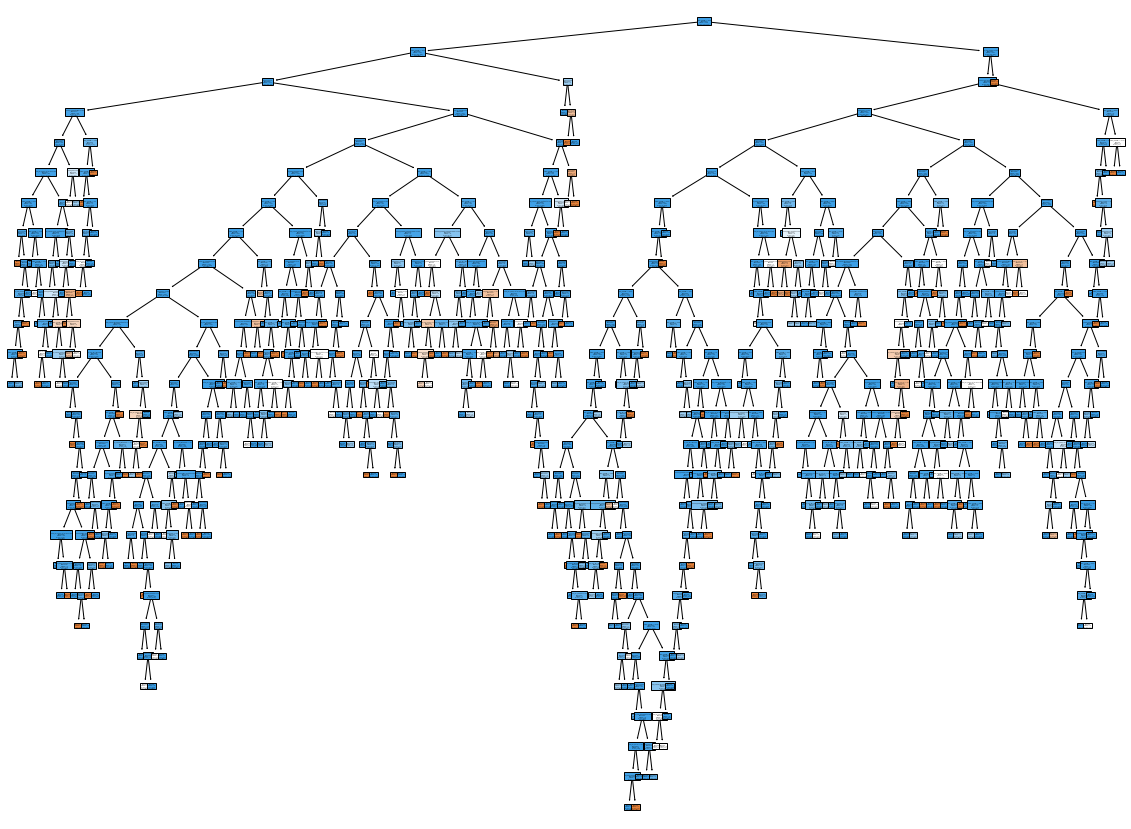

In [163]:
plt.figure(figsize=(20, 15))

plot_tree(clf_train,
          class_names = ['Mau','Bom'],
          filled = True,
          feature_names = X_train.columns);

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


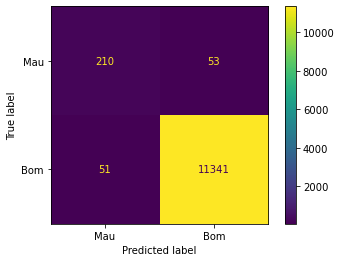

In [164]:
plot_confusion_matrix(clf_train, X_train, y_train, display_labels = ['Mau','Bom'])

In [165]:
predict_train = clf_train.predict(X_train)

In [166]:
print(f'Acurácia de {accuracy_score(y_train, predict_train)*100} %')

Acurácia de 99.1076791076791 %


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [167]:
clf_test = clf.fit(X_test, y_test)

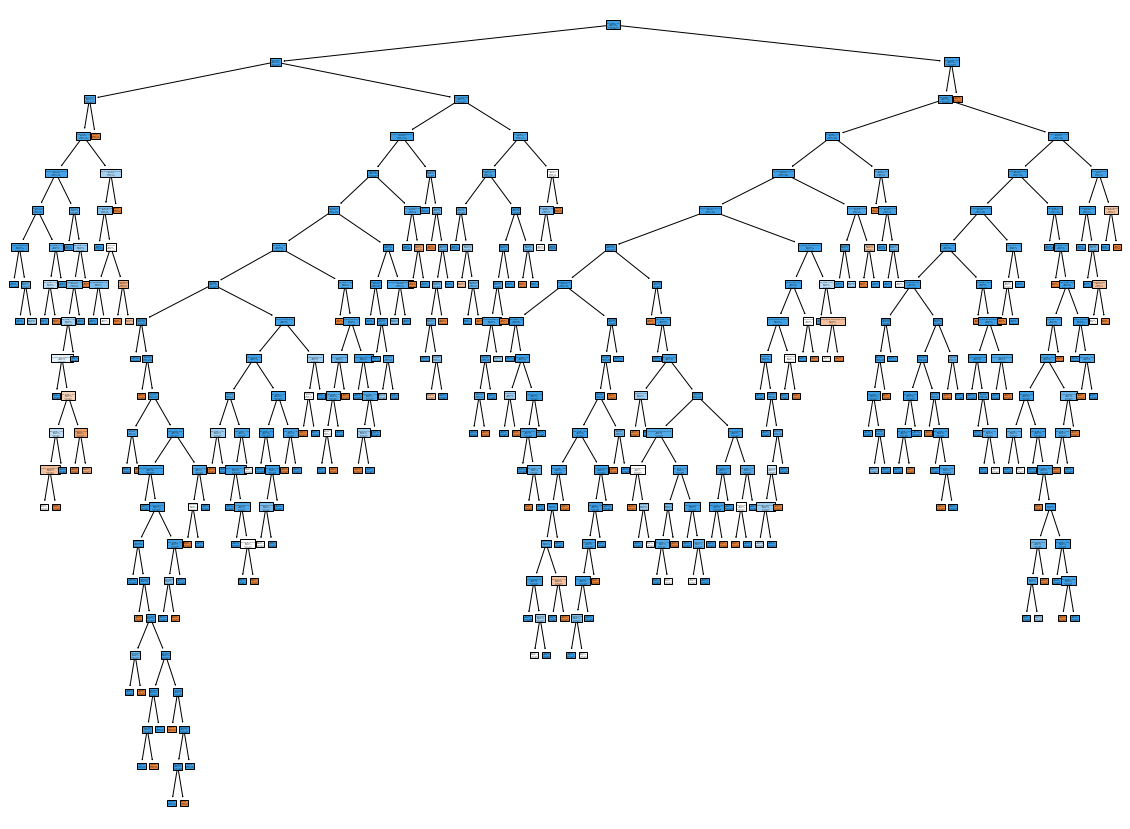

In [168]:
plt.figure(figsize=(20, 15))

plot_tree(clf_test,
          class_names = ['Mau','Bom'],
          filled = True,
          feature_names = X_test.columns);

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


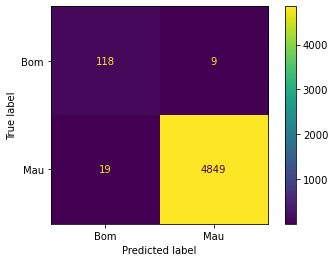

In [169]:
plot_confusion_matrix(clf_test, X_test, y_test, display_labels = ['Bom','Mau'])

In [170]:
predict_test = clf_test.predict(X_test)
print(f'Acurácia de {accuracy_score(y_test, predict_test)*100} %')

Acurácia de 99.43943943943944 %


A acurácia da base de test foi semelhante à de treino

##### Agora vamos a nova árvore proposta pelo exercício

4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?




In [171]:
clf_new = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_leaf=5)

In [172]:
clf_new = clf_new.fit(X,y)

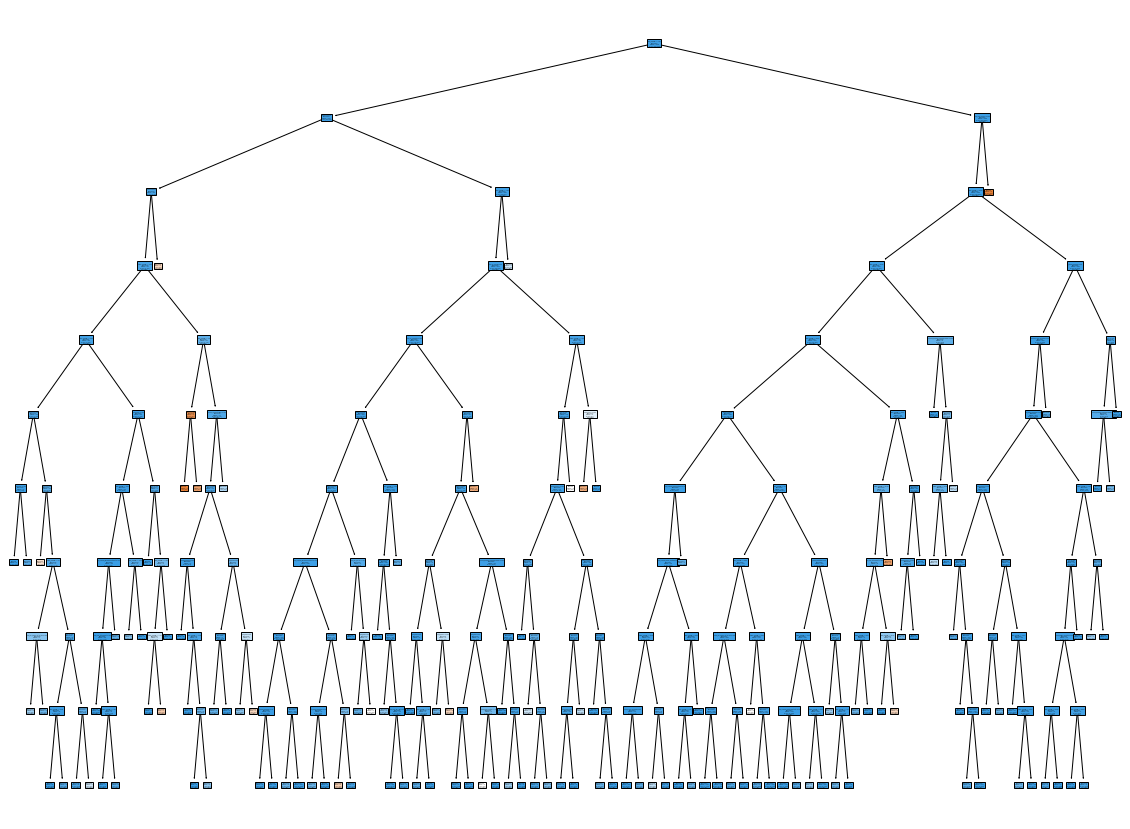

In [173]:
plt.figure(figsize=(20,15))

plot_tree(clf_new,
          class_names = ['Mau','Bom'],
          filled = True,
          feature_names = X.columns);

In [174]:
predict_new = clf_new.predict(X)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


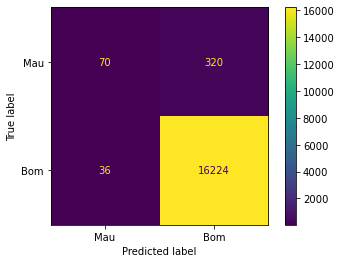

In [175]:
plot_confusion_matrix(clf_new, X, y, display_labels=['Mau','Bom'])

In [176]:
print(f'Acurácia de {accuracy_score(y, predict_new)*100} %')

Acurácia de 97.86186186186187 %


5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [177]:
df2 = df.copy()

In [178]:
df2['mau'] = 0

In [179]:
X = df2.drop('mau', axis = 1)
y = df2.mau

In [187]:
predict = clf_new.predict(X)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


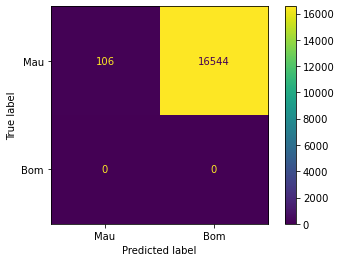

In [188]:
plot_confusion_matrix(clf_new, X, y, display_labels=['Mau','Bom'])

In [189]:
accuracy_score(y,predict)

0.006366366366366366